# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=30303de9928a5104bf77749cd564af26&units=imperial&q=


In [30]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 31:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | grand centre
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | valparaiso
Processing Record 7 of Set 1 | mataura
City not found. Skipping...
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | batetskiy
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | niamey
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | milot
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 23 of Set 1 

Processing Record 31 of Set 6 | asfi
Processing Record 32 of Set 6 | bathsheba
Processing Record 1 of Set 7 | taksimo
Processing Record 2 of Set 7 | khatanga
Processing Record 3 of Set 7 | nacala
Processing Record 4 of Set 7 | luanda
Processing Record 5 of Set 7 | abhar
City not found. Skipping...
Processing Record 6 of Set 7 | marsh harbour
Processing Record 7 of Set 7 | muna
Processing Record 8 of Set 7 | rawah
Processing Record 9 of Set 7 | avera
Processing Record 10 of Set 7 | xining
Processing Record 11 of Set 7 | provideniya
Processing Record 12 of Set 7 | carangola
Processing Record 13 of Set 7 | fortuna
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 7 | porto novo
Processing Record 15 of Set 7 | kaitangata
City not found. Skipping...
Processing Record 16 of Set 7 | qaqortoq
Processing Record 17 of Set 7 | nanortalik
Processing Record 18 of Set 7 | adjumani
Processing Record 19 of Set 7 | georgetown
Processing Record 20 of Set 7 | yuzhno-kuri

Processing Record 27 of Set 12 | duku
Processing Record 28 of Set 12 | honningsvag
Processing Record 29 of Set 12 | mochudi
Processing Record 30 of Set 12 | chase
Processing Record 31 of Set 12 | tura
Processing Record 32 of Set 12 | mackay
Processing Record 1 of Set 13 | raudeberg
Processing Record 2 of Set 13 | djougou
Processing Record 3 of Set 13 | sao jose da coroa grande
City not found. Skipping...
Processing Record 4 of Set 13 | grand river south east
Processing Record 5 of Set 13 | port blair
Processing Record 6 of Set 13 | srednekolymsk
Processing Record 7 of Set 13 | khrebtovaya
Processing Record 8 of Set 13 | paamiut
Processing Record 9 of Set 13 | vardo
Processing Record 10 of Set 13 | puri
Processing Record 11 of Set 13 | sovetskiy
City not found. Skipping...
Processing Record 12 of Set 13 | kibala
Processing Record 13 of Set 13 | dillon
Processing Record 14 of Set 13 | ignacio zaragoza
City not found. Skipping...
Processing Record 15 of Set 13 | puerto colombia
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [29]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,52,PH,1595786423,87,8.99,125.34,76.87,4.23
1,port alfred,20,CD,1595786423,44,-7.03,29.76,71.73,5.06
2,grand centre,1,US,1595786423,32,38.88,-109.50,80.60,4.70
3,dikson,84,RU,1595786423,91,73.51,80.55,38.73,14.94
4,rikitea,16,PF,1595786387,78,-23.12,-134.97,70.02,18.97


In [ ]:
#Exporting to csv
weather_dataframe.to_csv("weather_df.csv")

In [28]:
weather_data = pd.read_csv("weather_df.csv")
weather_df2 = weather_data.drop(columns=["Unnamed: 0"])
weather_df2.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,52,PH,1595786423,87,8.99,125.34,76.87,4.23
1,port alfred,20,CD,1595786423,44,-7.03,29.76,71.73,5.06
2,grand centre,1,US,1595786423,32,38.88,-109.50,80.60,4.70
3,dikson,84,RU,1595786423,91,73.51,80.55,38.73,14.94
4,rikitea,16,PF,1595786387,78,-23.12,-134.97,70.02,18.97


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

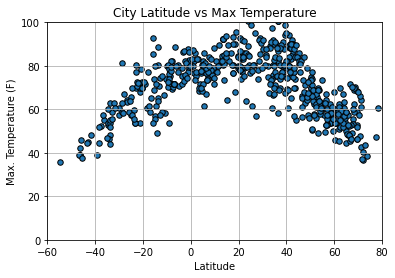

In [35]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

## Latitude vs. Humidity Plot

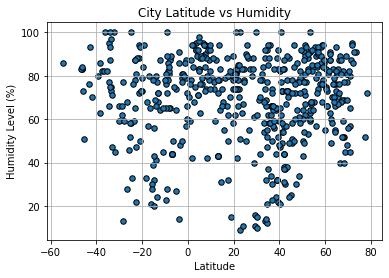

In [36]:

#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

## Latitude vs. Cloudiness Plot

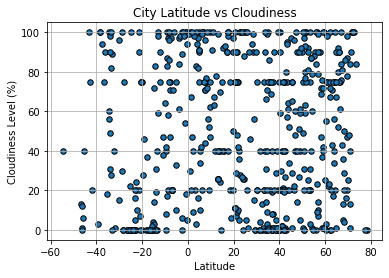

In [37]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

## Latitude vs. Wind Speed Plot

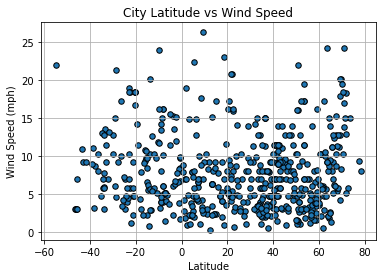

In [15]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,port alfred,20,CD,1595786423,44,-7.03,29.76,71.73,5.06
4,rikitea,16,PF,1595786387,78,-23.12,-134.97,70.02,18.97
5,valparaiso,89,CL,1595786423,47,-33.04,-71.63,59.00,11.41
6,mataura,1,NZ,1595786389,83,-46.19,168.86,39.00,3.00
10,ushuaia,40,AR,1595786385,86,-54.80,-68.30,35.60,21.92


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

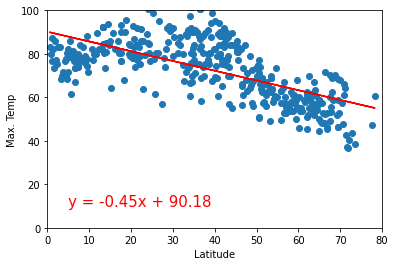

In [18]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

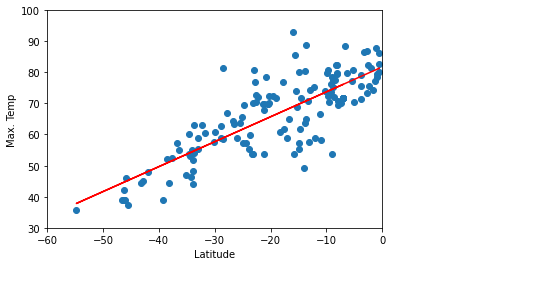

In [19]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

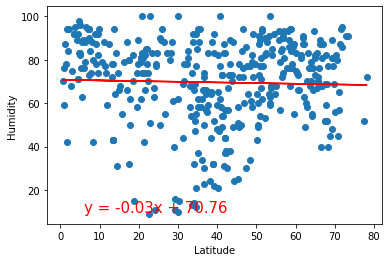

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

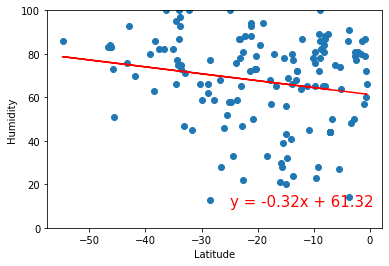

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

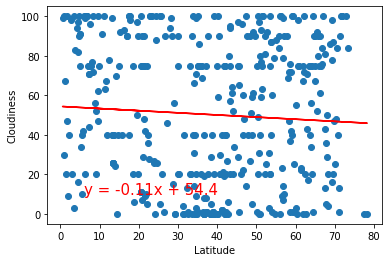

In [22]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

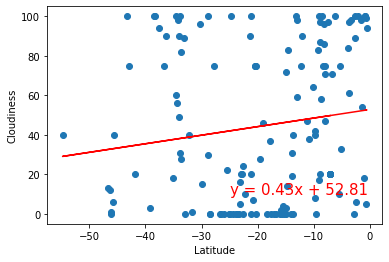

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

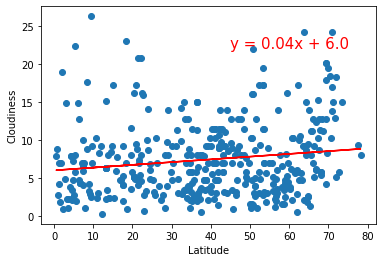

In [24]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

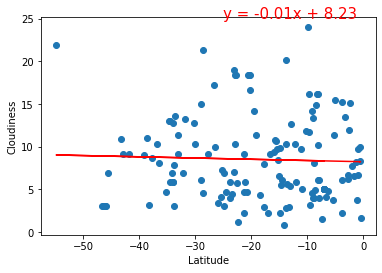

In [25]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")